In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load Data
df = pd.read_csv("/kaggle/input/taxi-trip-pricing-prediction-analysis/taxi_trip_pricing.csv") 

In [3]:
# Checking Null Values
missing_values = df.isnull().sum()

print(missing_values)

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64


In [6]:
# Handle Null Values
categorical_cols = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']
numerical_cols = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes','Trip_Price']

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

In [7]:
missing_values = df.isnull().sum()

print(missing_values)

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64


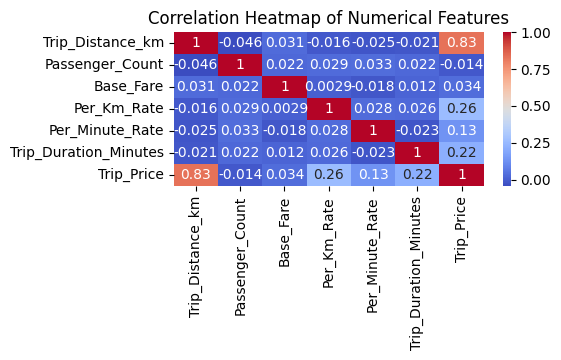

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 2))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

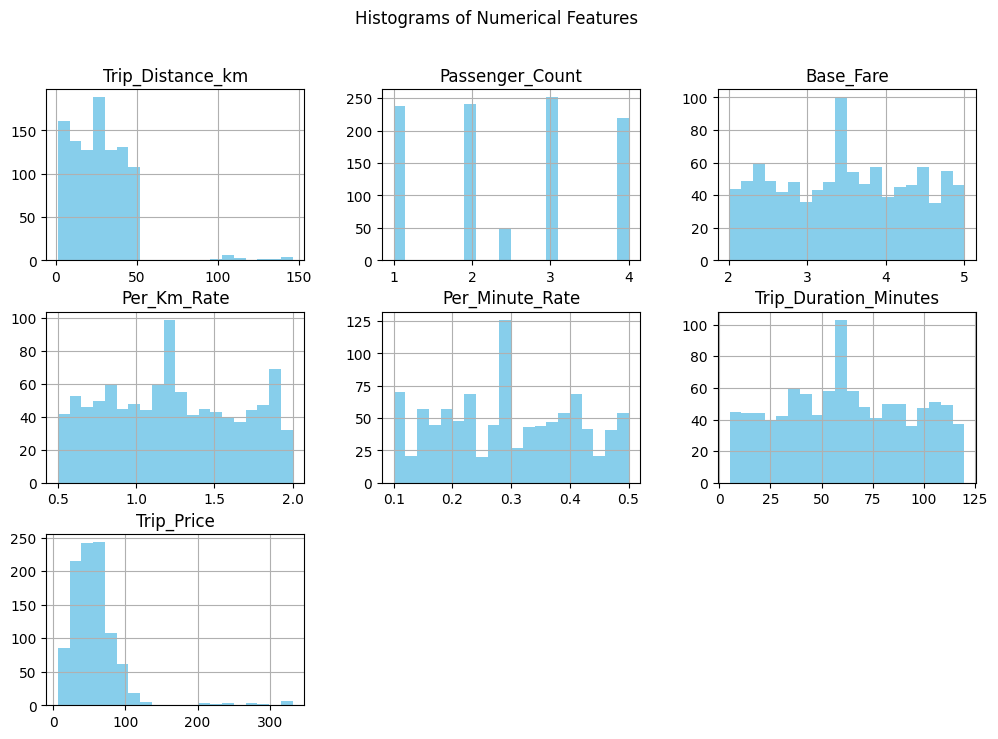

In [12]:
df[numerical_cols].hist(figsize=(12, 8), bins=20, color='skyblue')
plt.suptitle('Histograms of Numerical Features')
plt.show()

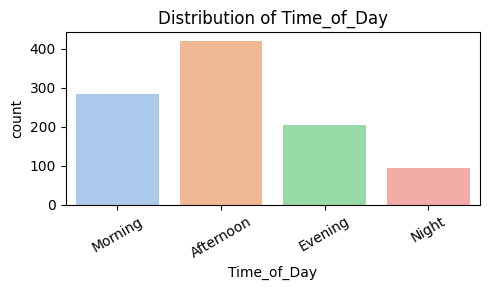

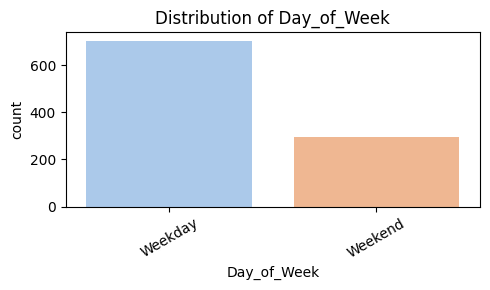

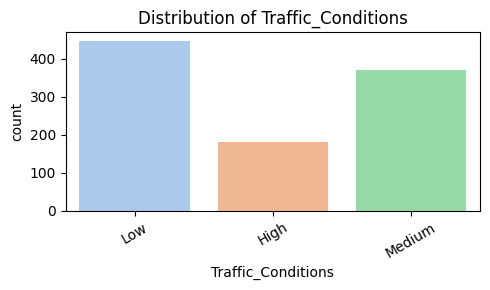

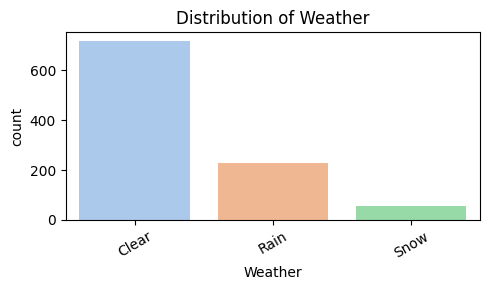

In [17]:


for col in categorical_cols:
    plt.figure(figsize=(5, 3))  # Smaller plot size
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

In [18]:
# Creating Target Column Price_Level
bins = [0, 20, 40, np.inf]
labels = ['Low', 'Medium', 'High']
df['Price_Level'] = pd.cut(df['Trip_Price'], bins=bins, labels=labels, include_lowest=True)

In [19]:
# Encode Categorical Variables
label_encoders = {}
categorical_to_encode = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather', 'Price_Level']
for col in categorical_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [20]:
# See first few rows with the new Price_Level column
print(df[['Trip_Price', 'Price_Level']].head())

# Count of each category
print("\nPrice_Level value counts:")
print(df['Price_Level'].value_counts())


   Trip_Price  Price_Level
0   36.262400            2
1   56.874773            0
2   52.903200            0
3   36.469800            2
4   15.618000            1

Price_Level value counts:
Price_Level
0    680
2    254
1     66
Name: count, dtype: int64


In [21]:
# View a few rows of encoded categorical columns
print("\nEncoded Categorical Columns:")
print(df[['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather', 'Price_Level']].head())

# See encoding mapping for each column
for col, encoder in label_encoders.items():
    print(f"\nLabel encoding for {col}:")
    for i, cls in enumerate(encoder.classes_):
        print(f"  {cls} --> {i}")



Encoded Categorical Columns:
   Time_of_Day  Day_of_Week  Traffic_Conditions  Weather  Price_Level
0            2            0                   1        0            2
1            0            0                   0        0            0
2            1            1                   0        0            0
3            1            0                   1        0            2
4            1            0                   0        0            1

Label encoding for Time_of_Day:
  Afternoon --> 0
  Evening --> 1
  Morning --> 2
  Night --> 3

Label encoding for Day_of_Week:
  Weekday --> 0
  Weekend --> 1

Label encoding for Traffic_Conditions:
  High --> 0
  Low --> 1
  Medium --> 2

Label encoding for Weather:
  Clear --> 0
  Rain --> 1
  Snow --> 2

Label encoding for Price_Level:
  High --> 0
  Low --> 1
  Medium --> 2


In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('Price_Level', axis=1)
y = df['Price_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)


Train features shape: (800, 11)
Test features shape: (200, 11)


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [24]:
# SVM with Linear Kernel

from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("🔹 SVM Linear Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Precision:", precision_score(y_test, y_pred_linear, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_linear, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_linear, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

🔹 SVM Linear Kernel
Accuracy: 0.98
Precision: 0.9805833333333334
Recall: 0.98
F1 Score: 0.9794188288196416
Confusion Matrix:
 [[131   0   0]
 [  0  13   3]
 [  1   0  52]]


In [25]:
# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("\n🔹 SVM RBF Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Precision:", precision_score(y_test, y_pred_rbf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rbf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rbf, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))


🔹 SVM RBF Kernel
Accuracy: 0.945
Precision: 0.9487840967575915
Recall: 0.945
F1 Score: 0.9396569777324494
Confusion Matrix:
 [[131   0   0]
 [  0   8   8]
 [  3   0  50]]


In [26]:
# Logistic Regression with L1 (Lasso)
from sklearn.linear_model import LogisticRegression

logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr')
logreg_l1.fit(X_train, y_train)
y_pred_l1 = logreg_l1.predict(X_test)

print("\n🔹 Logistic Regression (L1)")
print("Accuracy:", accuracy_score(y_test, y_pred_l1))
print("Precision:", precision_score(y_test, y_pred_l1, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_l1, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_l1, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_l1))



🔹 Logistic Regression (L1)
Accuracy: 0.95
Precision: 0.9516835016835016
Recall: 0.95
F1 Score: 0.9471518004412741
Confusion Matrix:
 [[131   0   0]
 [  0  10   6]
 [  4   0  49]]


In [27]:
# Logistic Regression with L2 (Ridge)
logreg_l2 = LogisticRegression(penalty='l2', solver='liblinear', multi_class='ovr')
logreg_l2.fit(X_train, y_train)
y_pred_l2 = logreg_l2.predict(X_test)

print("\n🔹 Logistic Regression (L2)")
print("Accuracy:", accuracy_score(y_test, y_pred_l2))
print("Precision:", precision_score(y_test, y_pred_l2, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_l2, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_l2, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_l2))



🔹 Logistic Regression (L2)
Accuracy: 0.91
Precision: 0.9110435663627153
Recall: 0.91
F1 Score: 0.9058766968325793
Confusion Matrix:
 [[130   0   1]
 [  0  10   6]
 [ 11   0  42]]
